In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,            # base font size
    "axes.labelsize": 16,       # x/y labels
    "axes.titlesize": 17,       # title
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "figure.dpi": 300
})

plt.figure(figsize=(8, 5))

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

# Different Approaches Used

## SVM

In [29]:
# Loading the results
svm_incorrect = pd.read_csv("ml_methods/svm_incorrect.csv")
svm_correct = pd.read_csv("ml_methods/svm_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in svm_incorrect['datatype'].unique():
  data = svm_incorrect[svm_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_svm_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in svm_correct['datatype'].unique():
  data = svm_correct[svm_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_svm_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

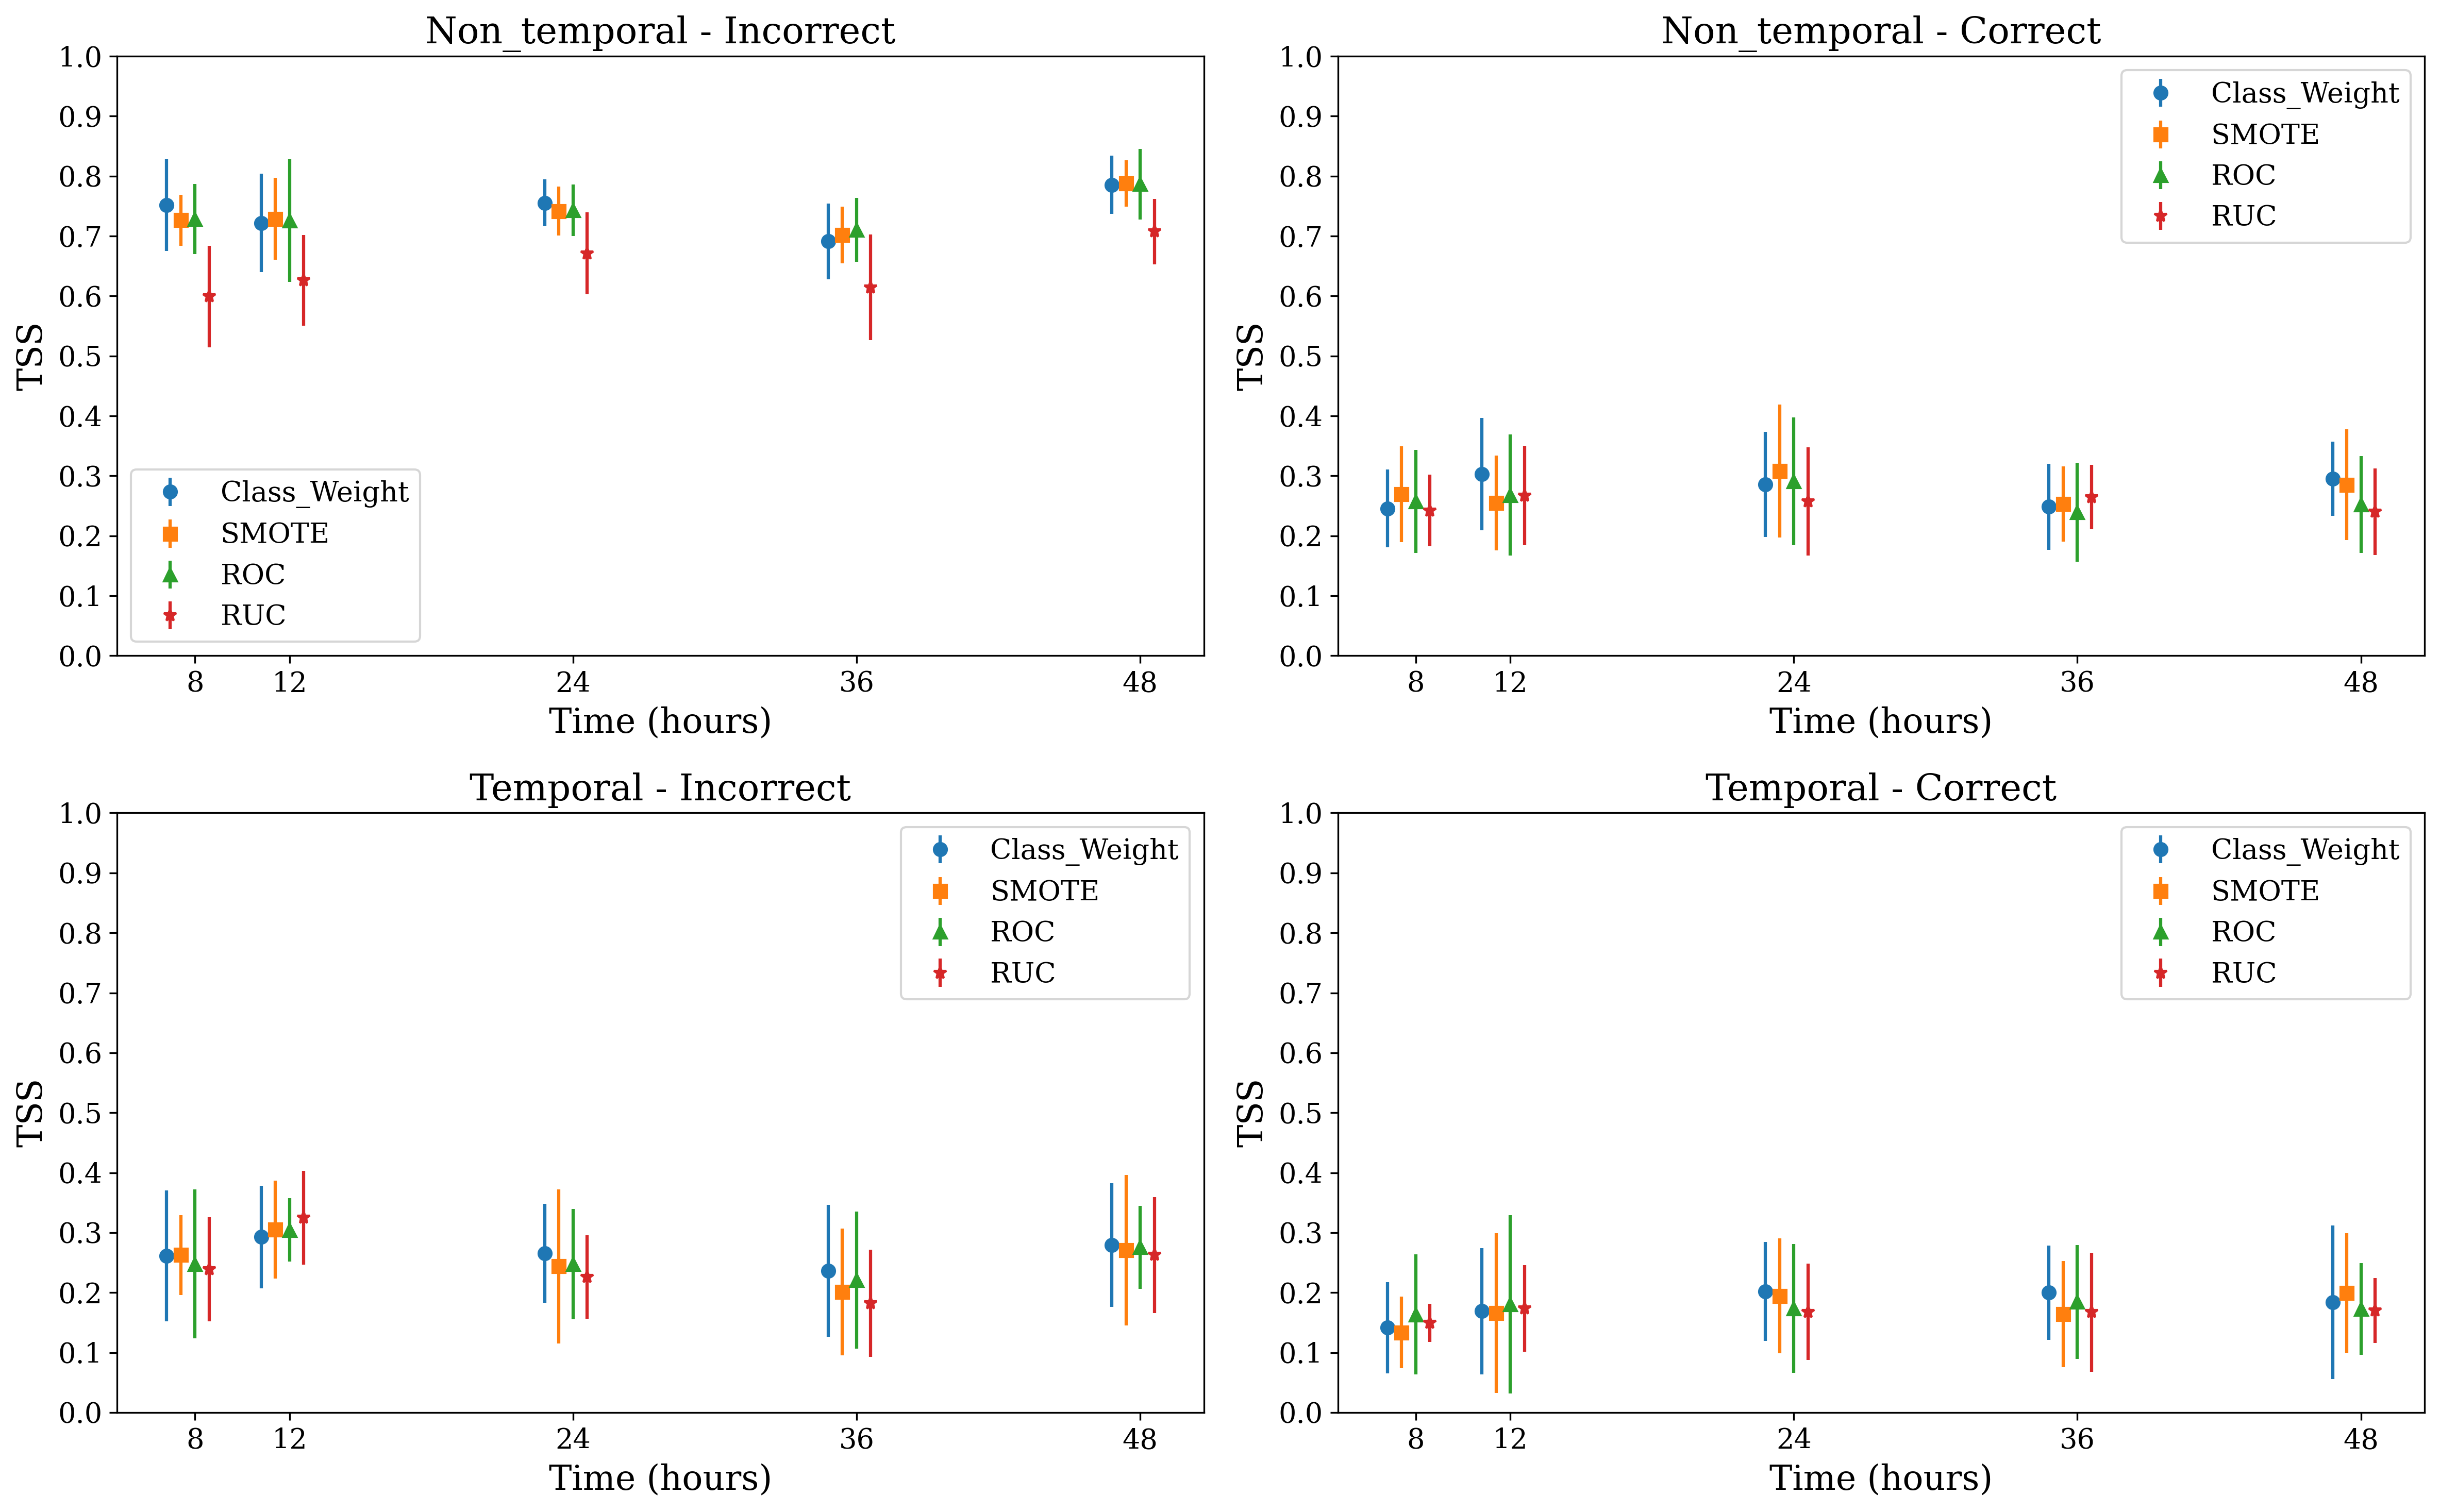

: 

In [ ]:
fig = plt.figure(figsize=(16, 10),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8, 12, 24, 36, 48]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_svm_incorrect[(best_tss_svm_incorrect['datatype'] == value) &(best_tss_svm_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_svm_correct[(best_tss_svm_correct['datatype'] == value) & (best_tss_svm_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## LDA

In [25]:
# Loading the results
lda_incorrect = pd.read_csv("ml_methods/lda_incorrect.csv")
lda_correct = pd.read_csv("ml_methods/lda_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in lda_incorrect['datatype'].unique():
  data = lda_incorrect[lda_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_lda_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in lda_correct['datatype'].unique():
  data = lda_correct[lda_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_lda_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

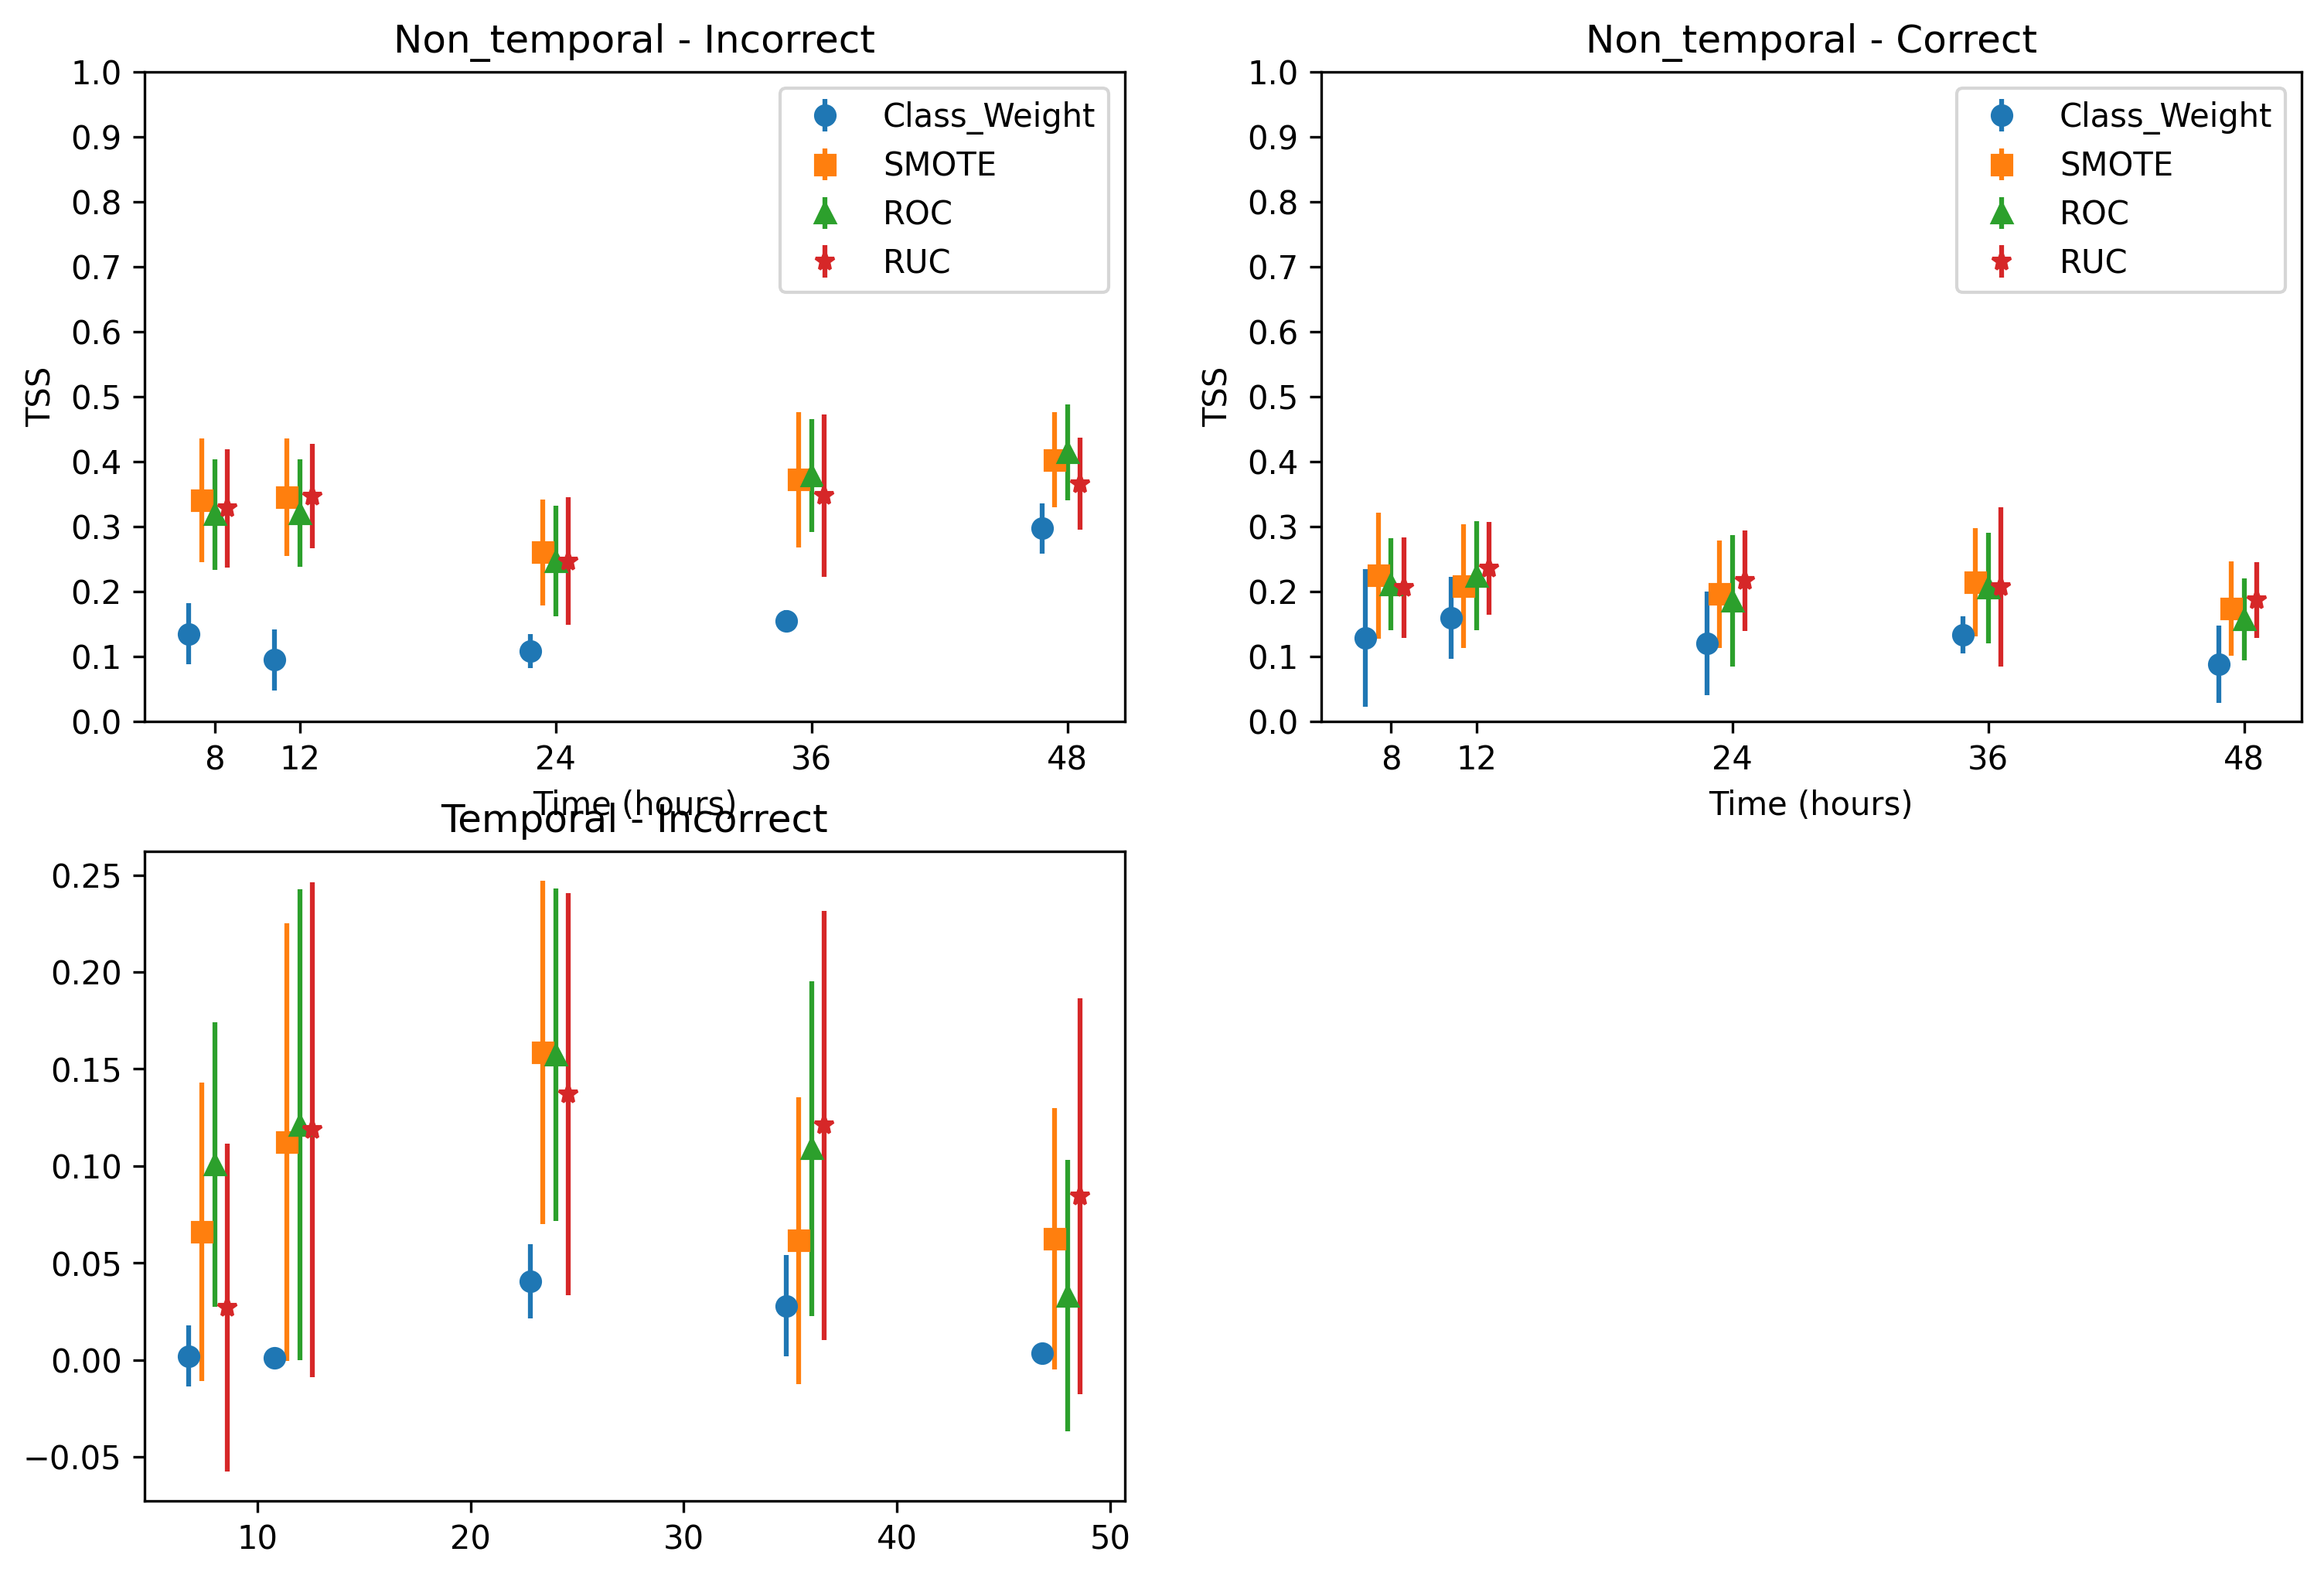

In [26]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], 8, 12, 24, 36, 48]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_lda_incorrect[(best_tss_lda_incorrect['datatype'] == value) &(best_tss_lda_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_lda_correct[(best_tss_lda_correct['datatype'] == value) & (best_tss_lda_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## XGboost


In [ ]:
# Loading the results
xgboost_incorrect = pd.read_csv("ml_methods/xgboost_incorrect.csv")
xgboost_correct = pd.read_csv("ml_methods/xgboost_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in xgboost_incorrect['datatype'].unique():
  data = xgboost_incorrect[xgboost_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_xgboost_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in xgboost_correct['datatype'].unique():
  data = xgboost_correct[xgboost_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_xgboost_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

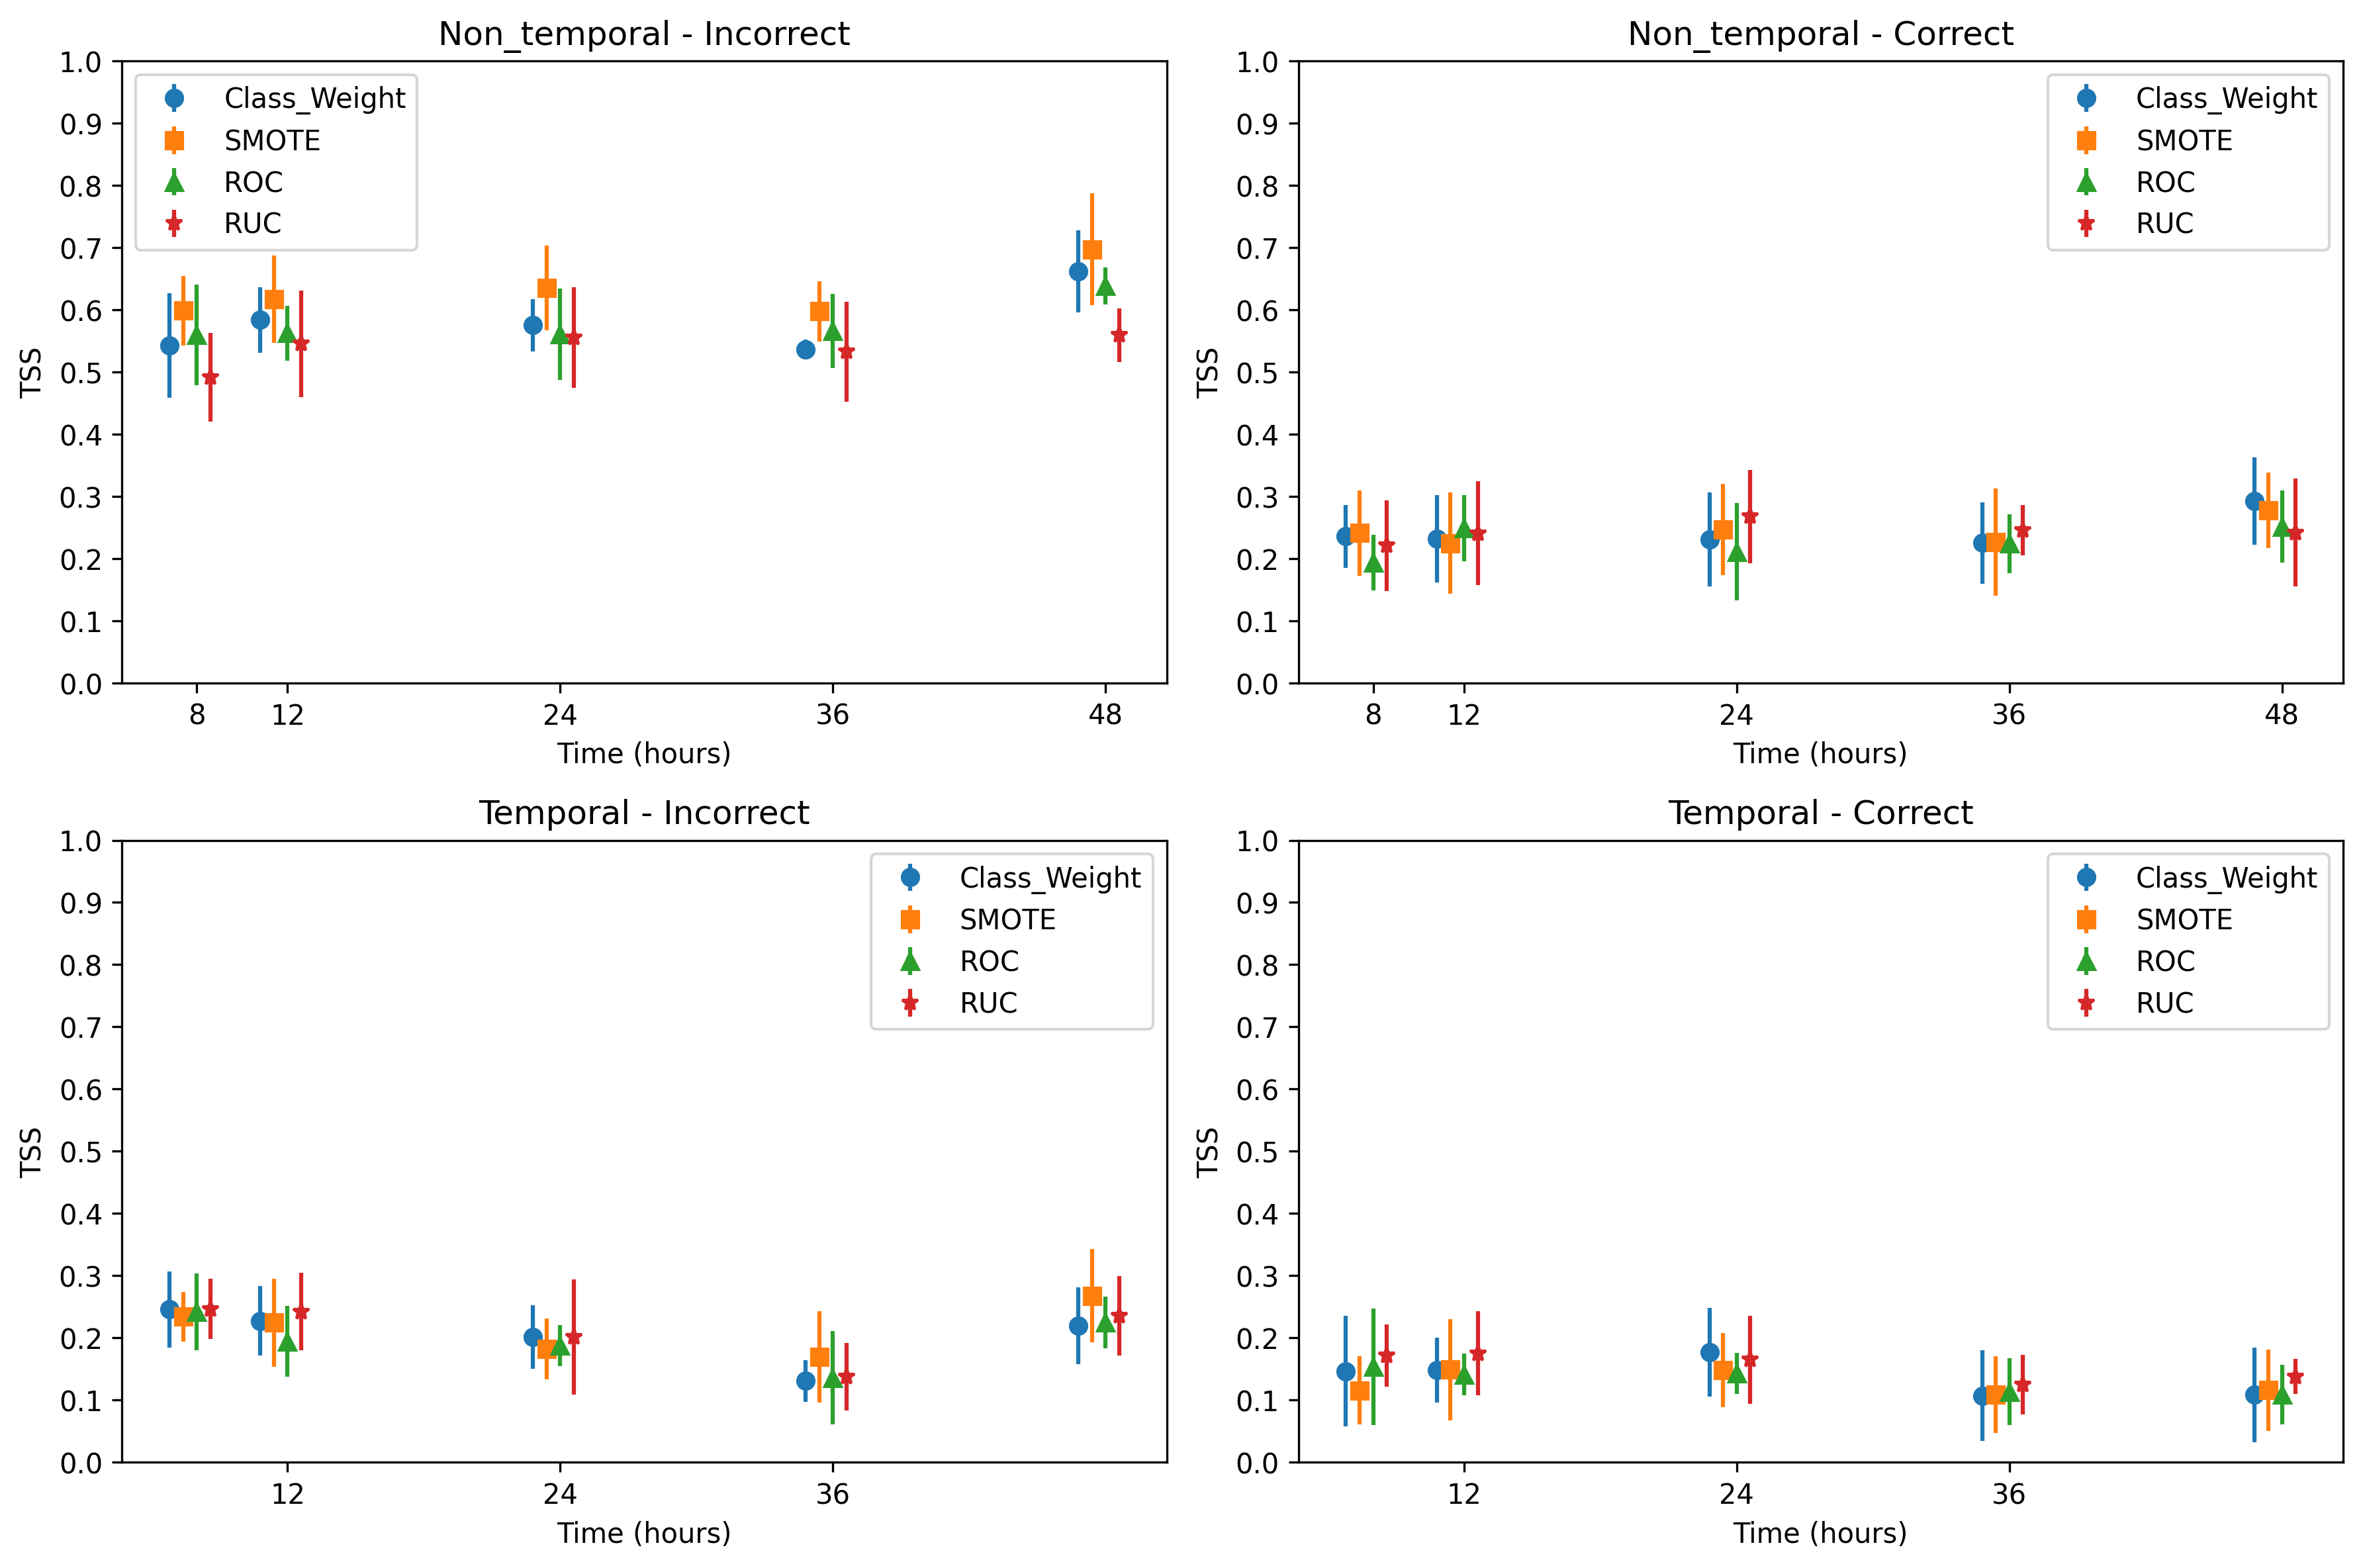

In [ ]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8, 12, 24, 36]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_xgboost_incorrect[(best_tss_xgboost_incorrect['datatype'] == value) &(best_tss_xgboost_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_xgboost_correct[(best_tss_xgboost_correct['datatype'] == value) & (best_tss_xgboost_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
# Loading the results
rf_incorrect = pd.read_csv("ml_methods/rf_incorrect.csv")
rf_correct = pd.read_csv("ml_methods/rf_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in rf_incorrect['datatype'].unique():
  data = rf_incorrect[rf_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_rf_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in rf_correct['datatype'].unique():
  data = rf_correct[rf_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_rf_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

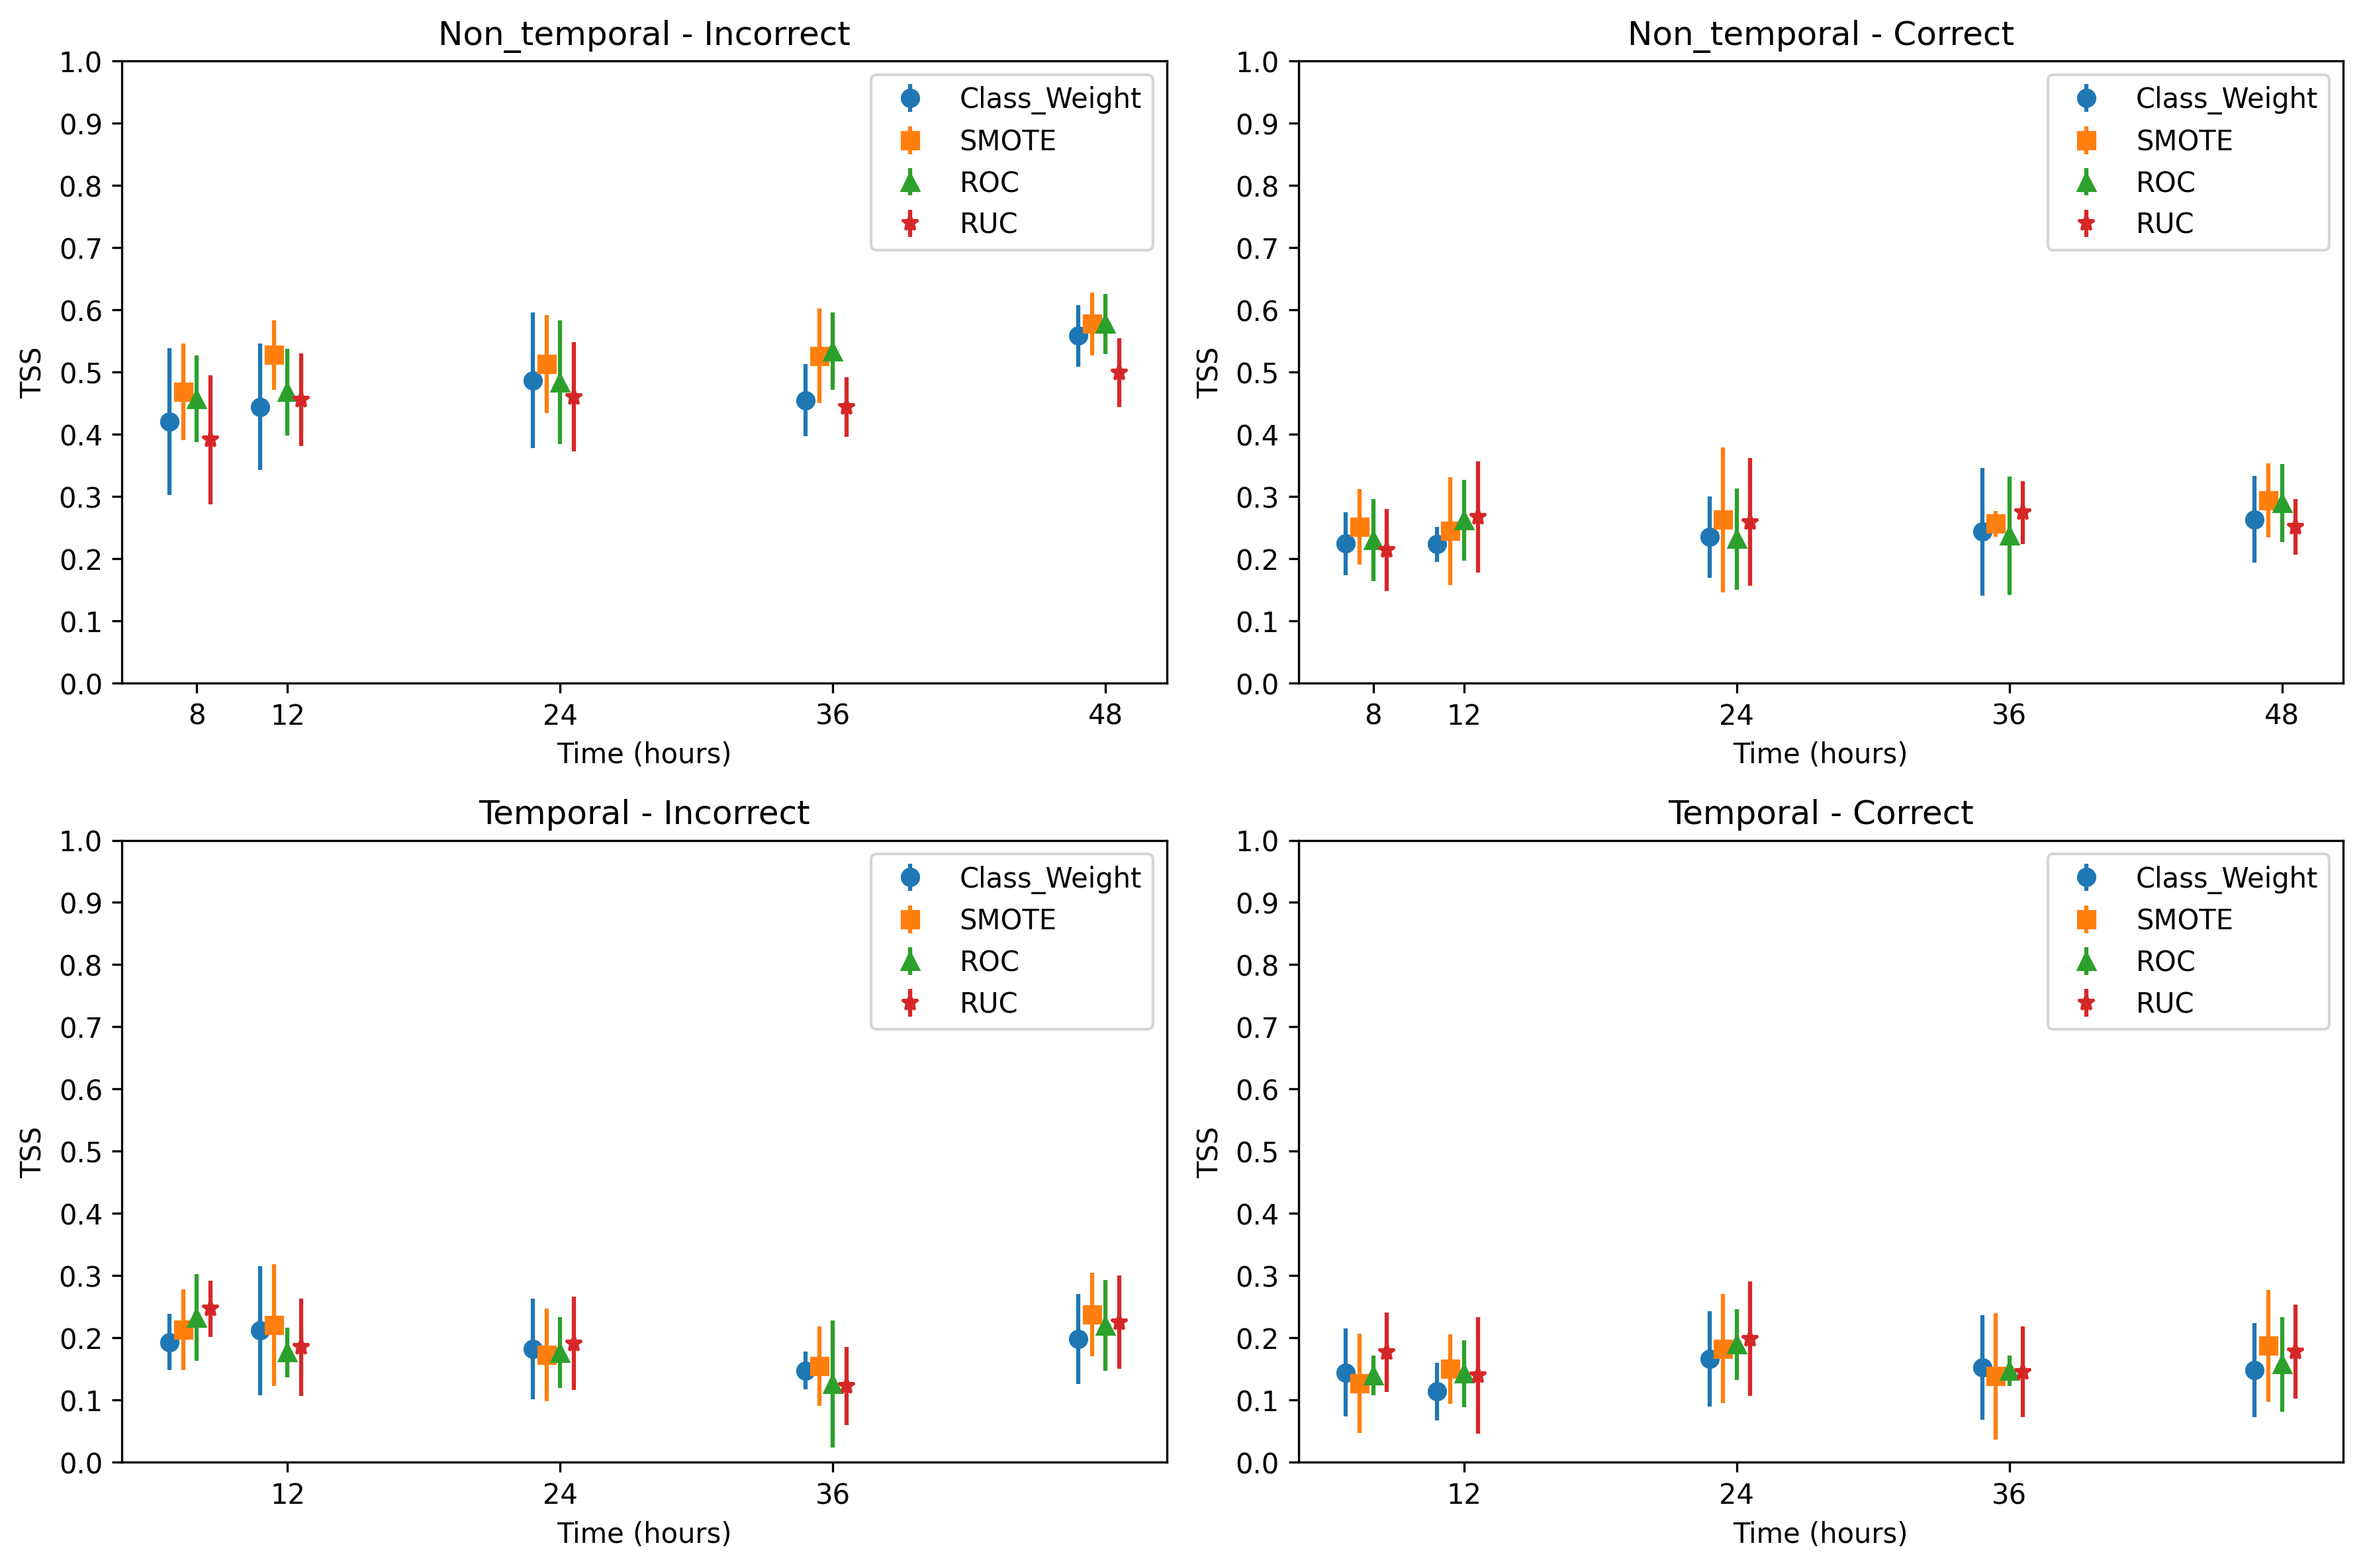

In [ ]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8,12, 24, 36,48]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_rf_incorrect[(best_tss_rf_incorrect['datatype'] == value) &(best_tss_rf_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_rf_correct[(best_tss_rf_correct['datatype'] == value) & (best_tss_rf_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## Decision Trees


In [ ]:
# Loading the results
dt_incorrect = pd.read_csv("ml_methods/dt_incorrect.csv")
dt_correct = pd.read_csv("ml_methods/dt_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in dt_incorrect['datatype'].unique():
  data = dt_incorrect[dt_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_dt_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in dt_correct['datatype'].unique():
  data = dt_correct[dt_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_dt_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

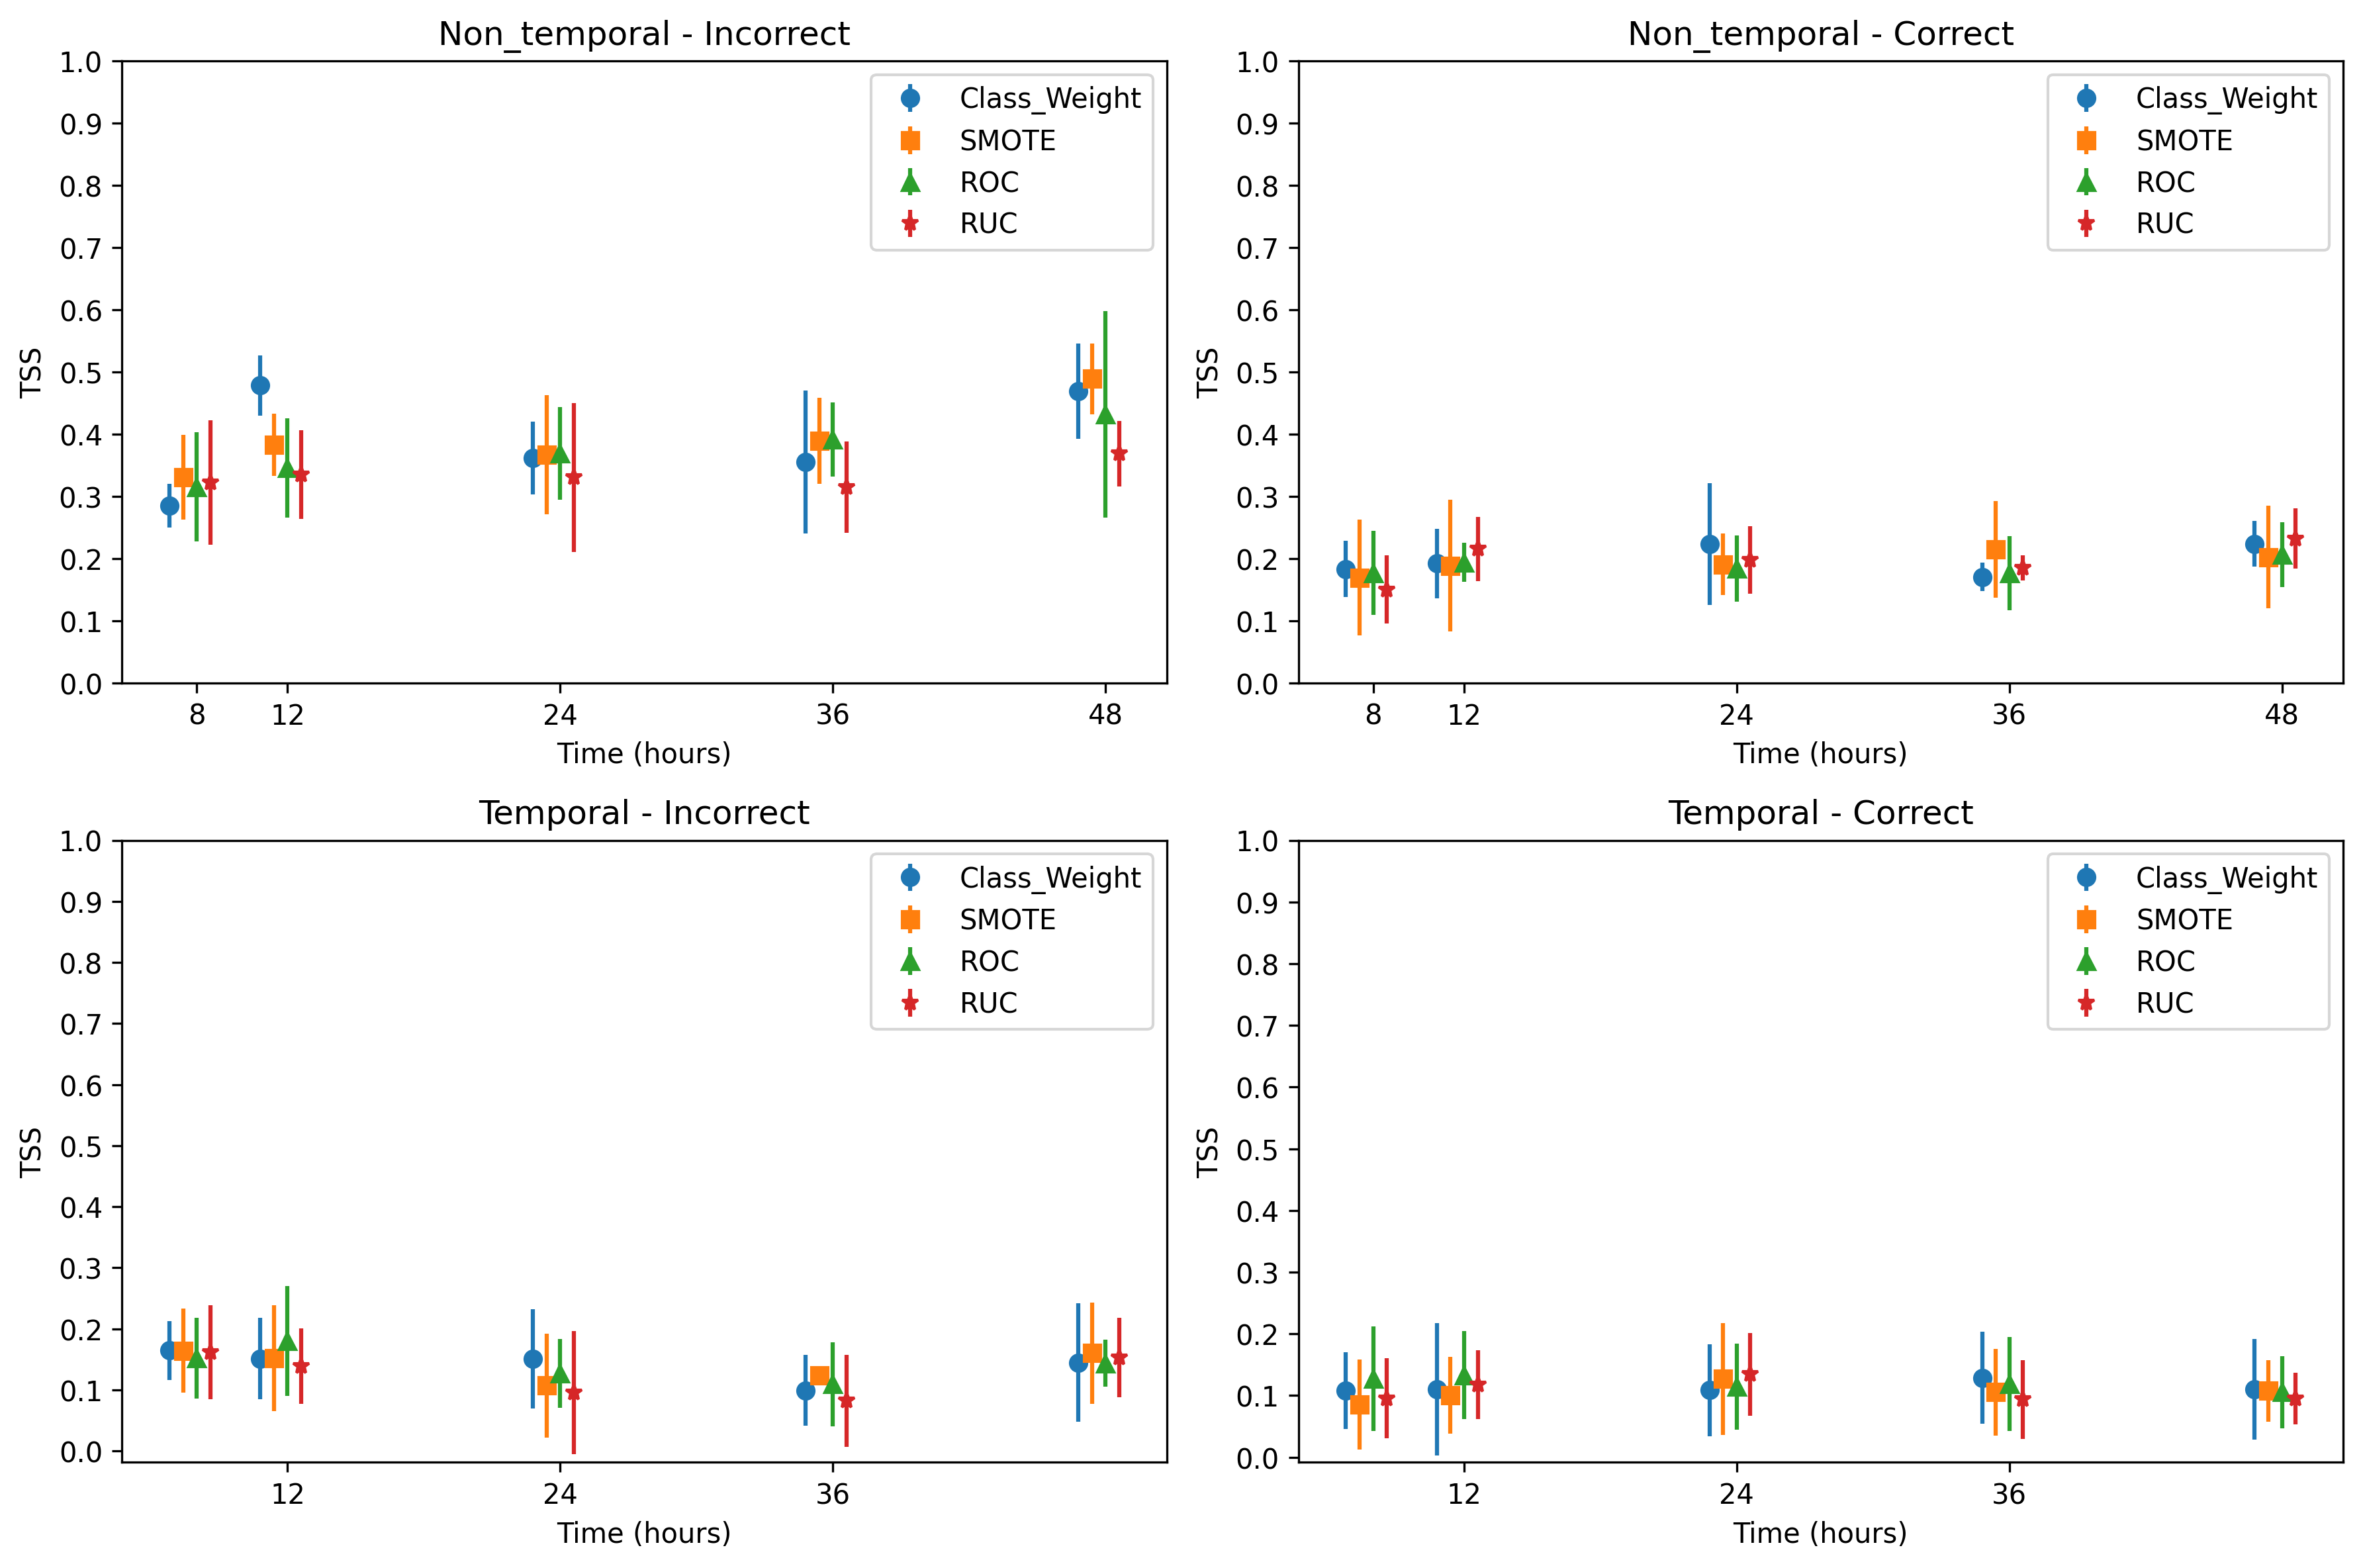

In [ ]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8, 12, 24, 36, 48]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_dt_incorrect[(best_tss_dt_incorrect['datatype'] == value) &(best_tss_dt_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_dt_correct[(best_tss_dt_correct['datatype'] == value) & (best_tss_dt_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
# Loading the results
lr_incorrect = pd.read_csv("ml_methods/lr_incorrect.csv")
lr_correct = pd.read_csv("ml_methods/lr_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in lr_incorrect['datatype'].unique():
  data = lr_incorrect[lr_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_lr_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in lr_correct['datatype'].unique():
  data = lr_correct[lr_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_lr_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

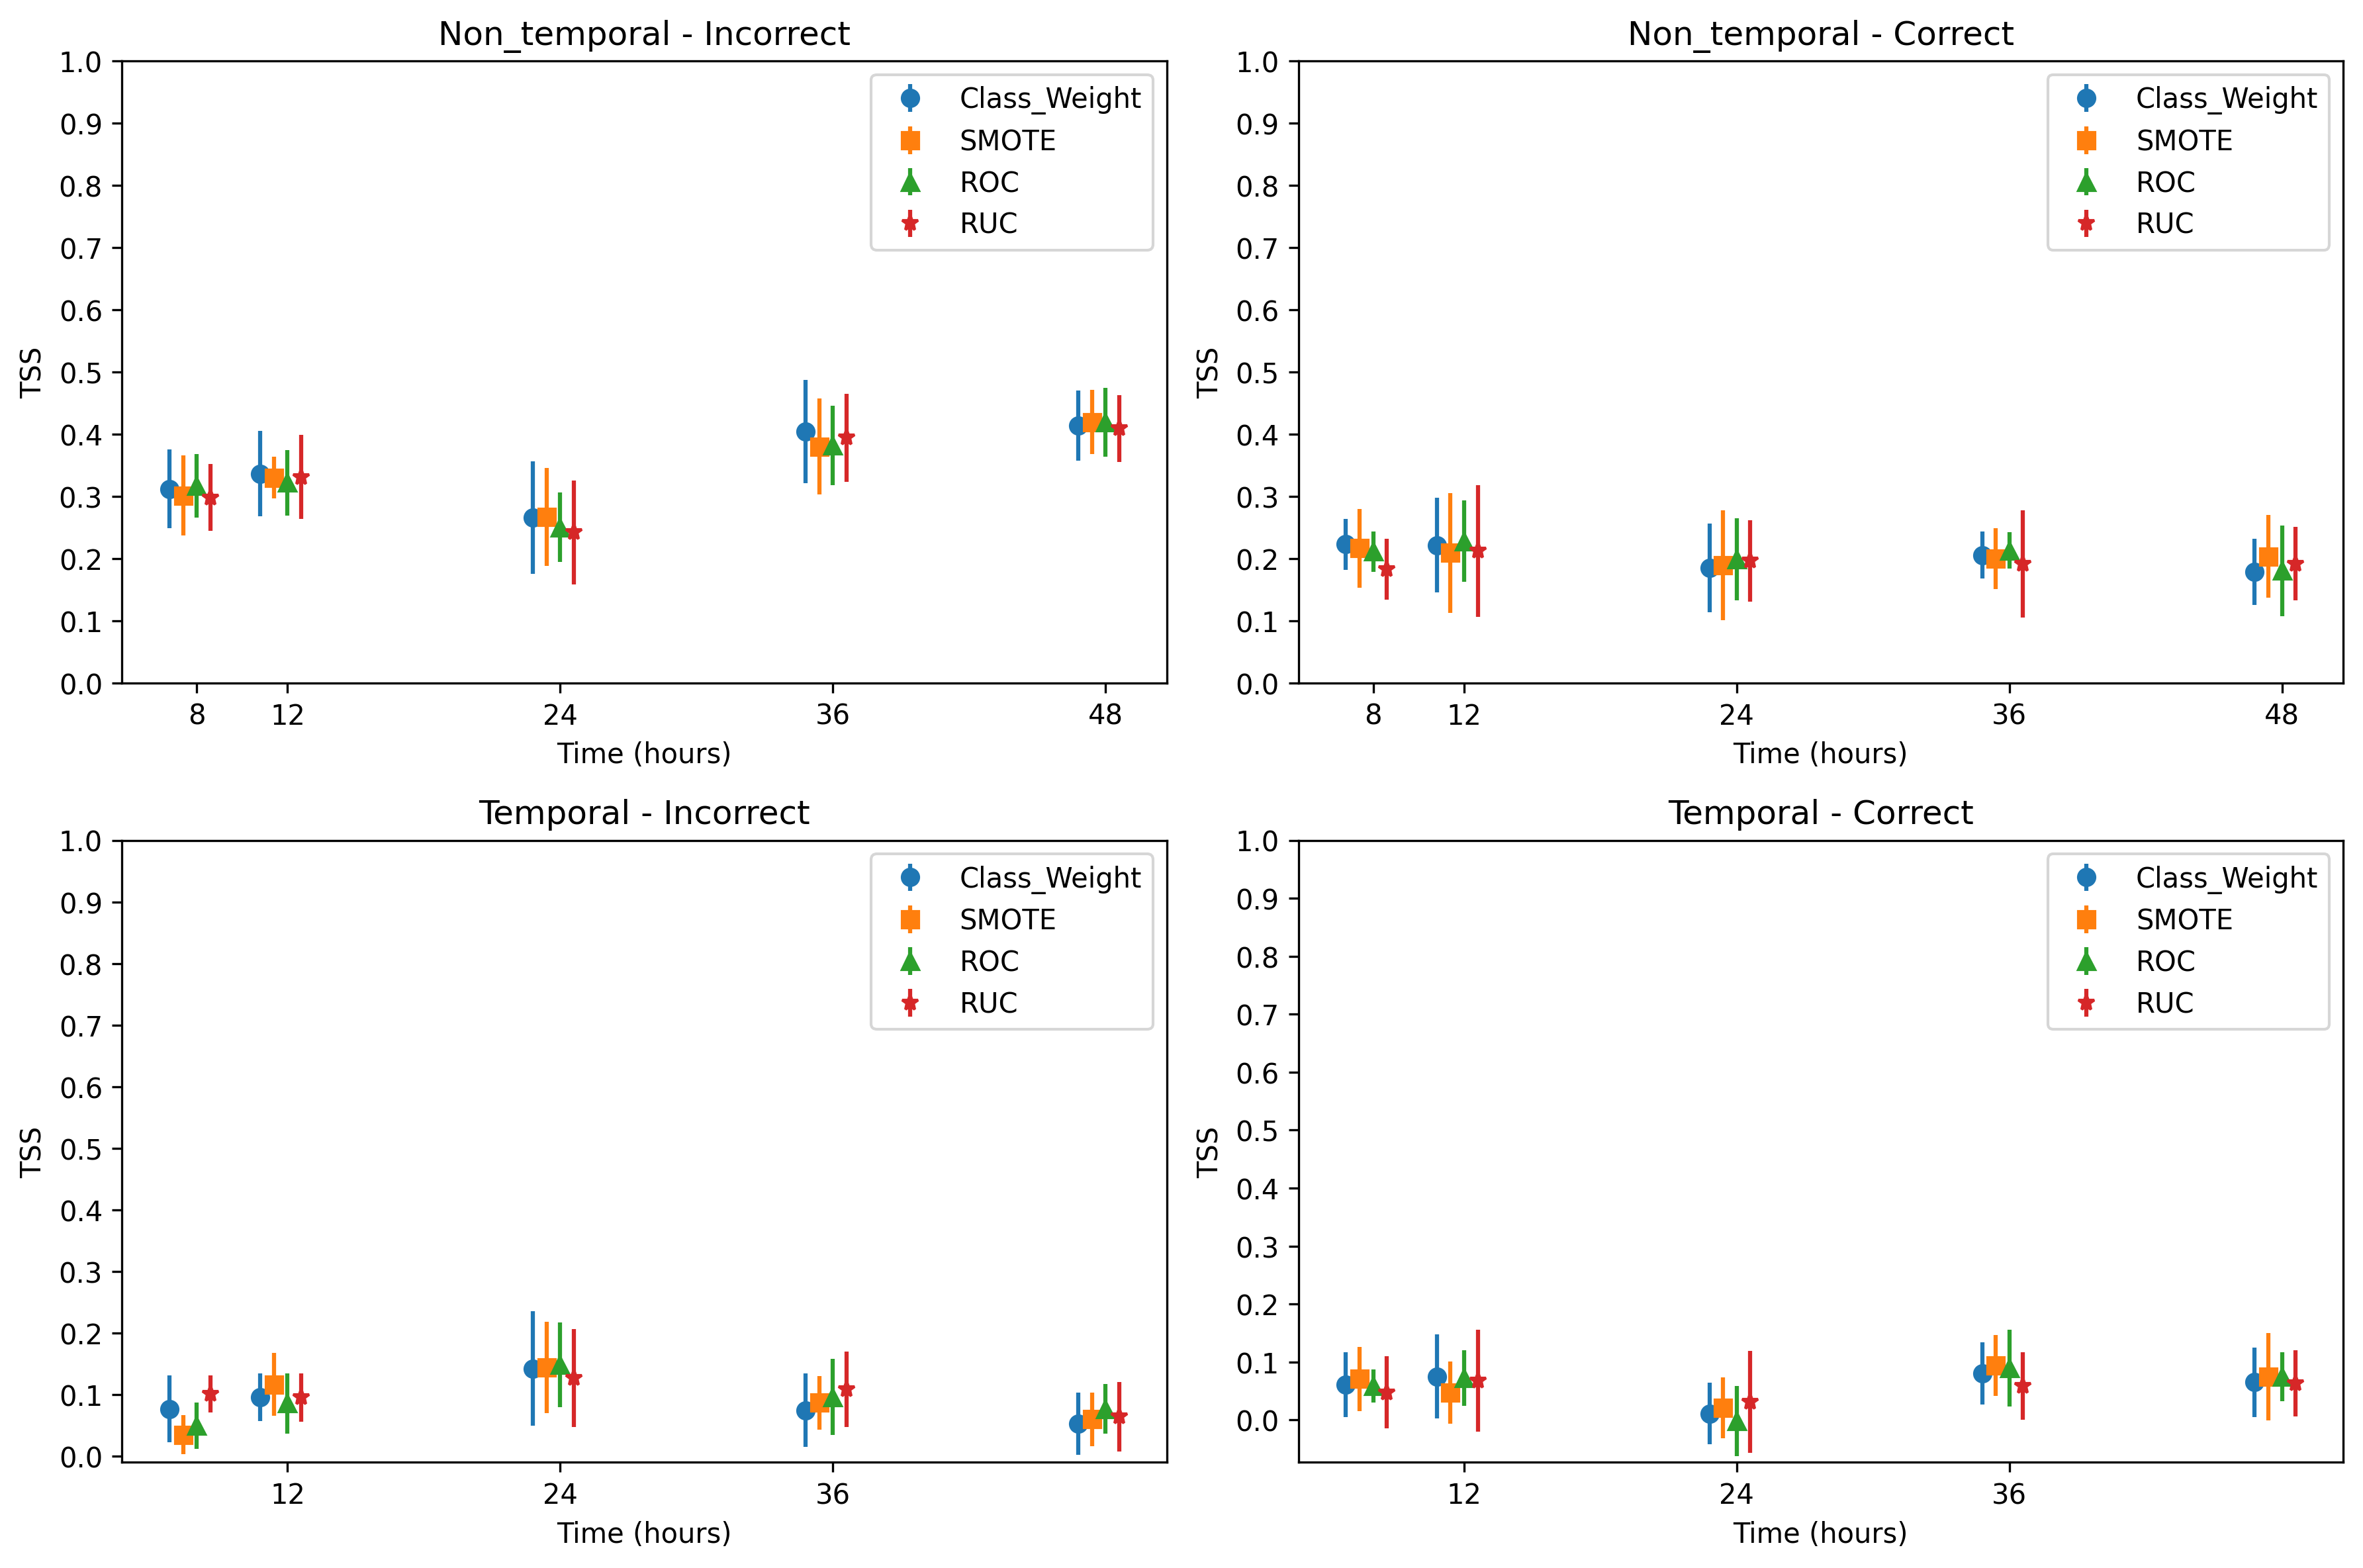

In [ ]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8, 12, 24, 36, 48]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_lr_incorrect[(best_tss_dt_incorrect['datatype'] == value) &(best_tss_lr_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_lr_correct[(best_tss_dt_correct['datatype'] == value) & (best_tss_lr_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## GradientBoost

In [ ]:
# Loading the results
gb_incorrect = pd.read_csv("ml_methods/gb_incorrect.csv")
gb_correct = pd.read_csv("ml_methods/gb_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in gb_incorrect['datatype'].unique():
  data = gb_incorrect[gb_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_gb_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in gb_correct['datatype'].unique():
  data = gb_correct[gb_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_gb_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

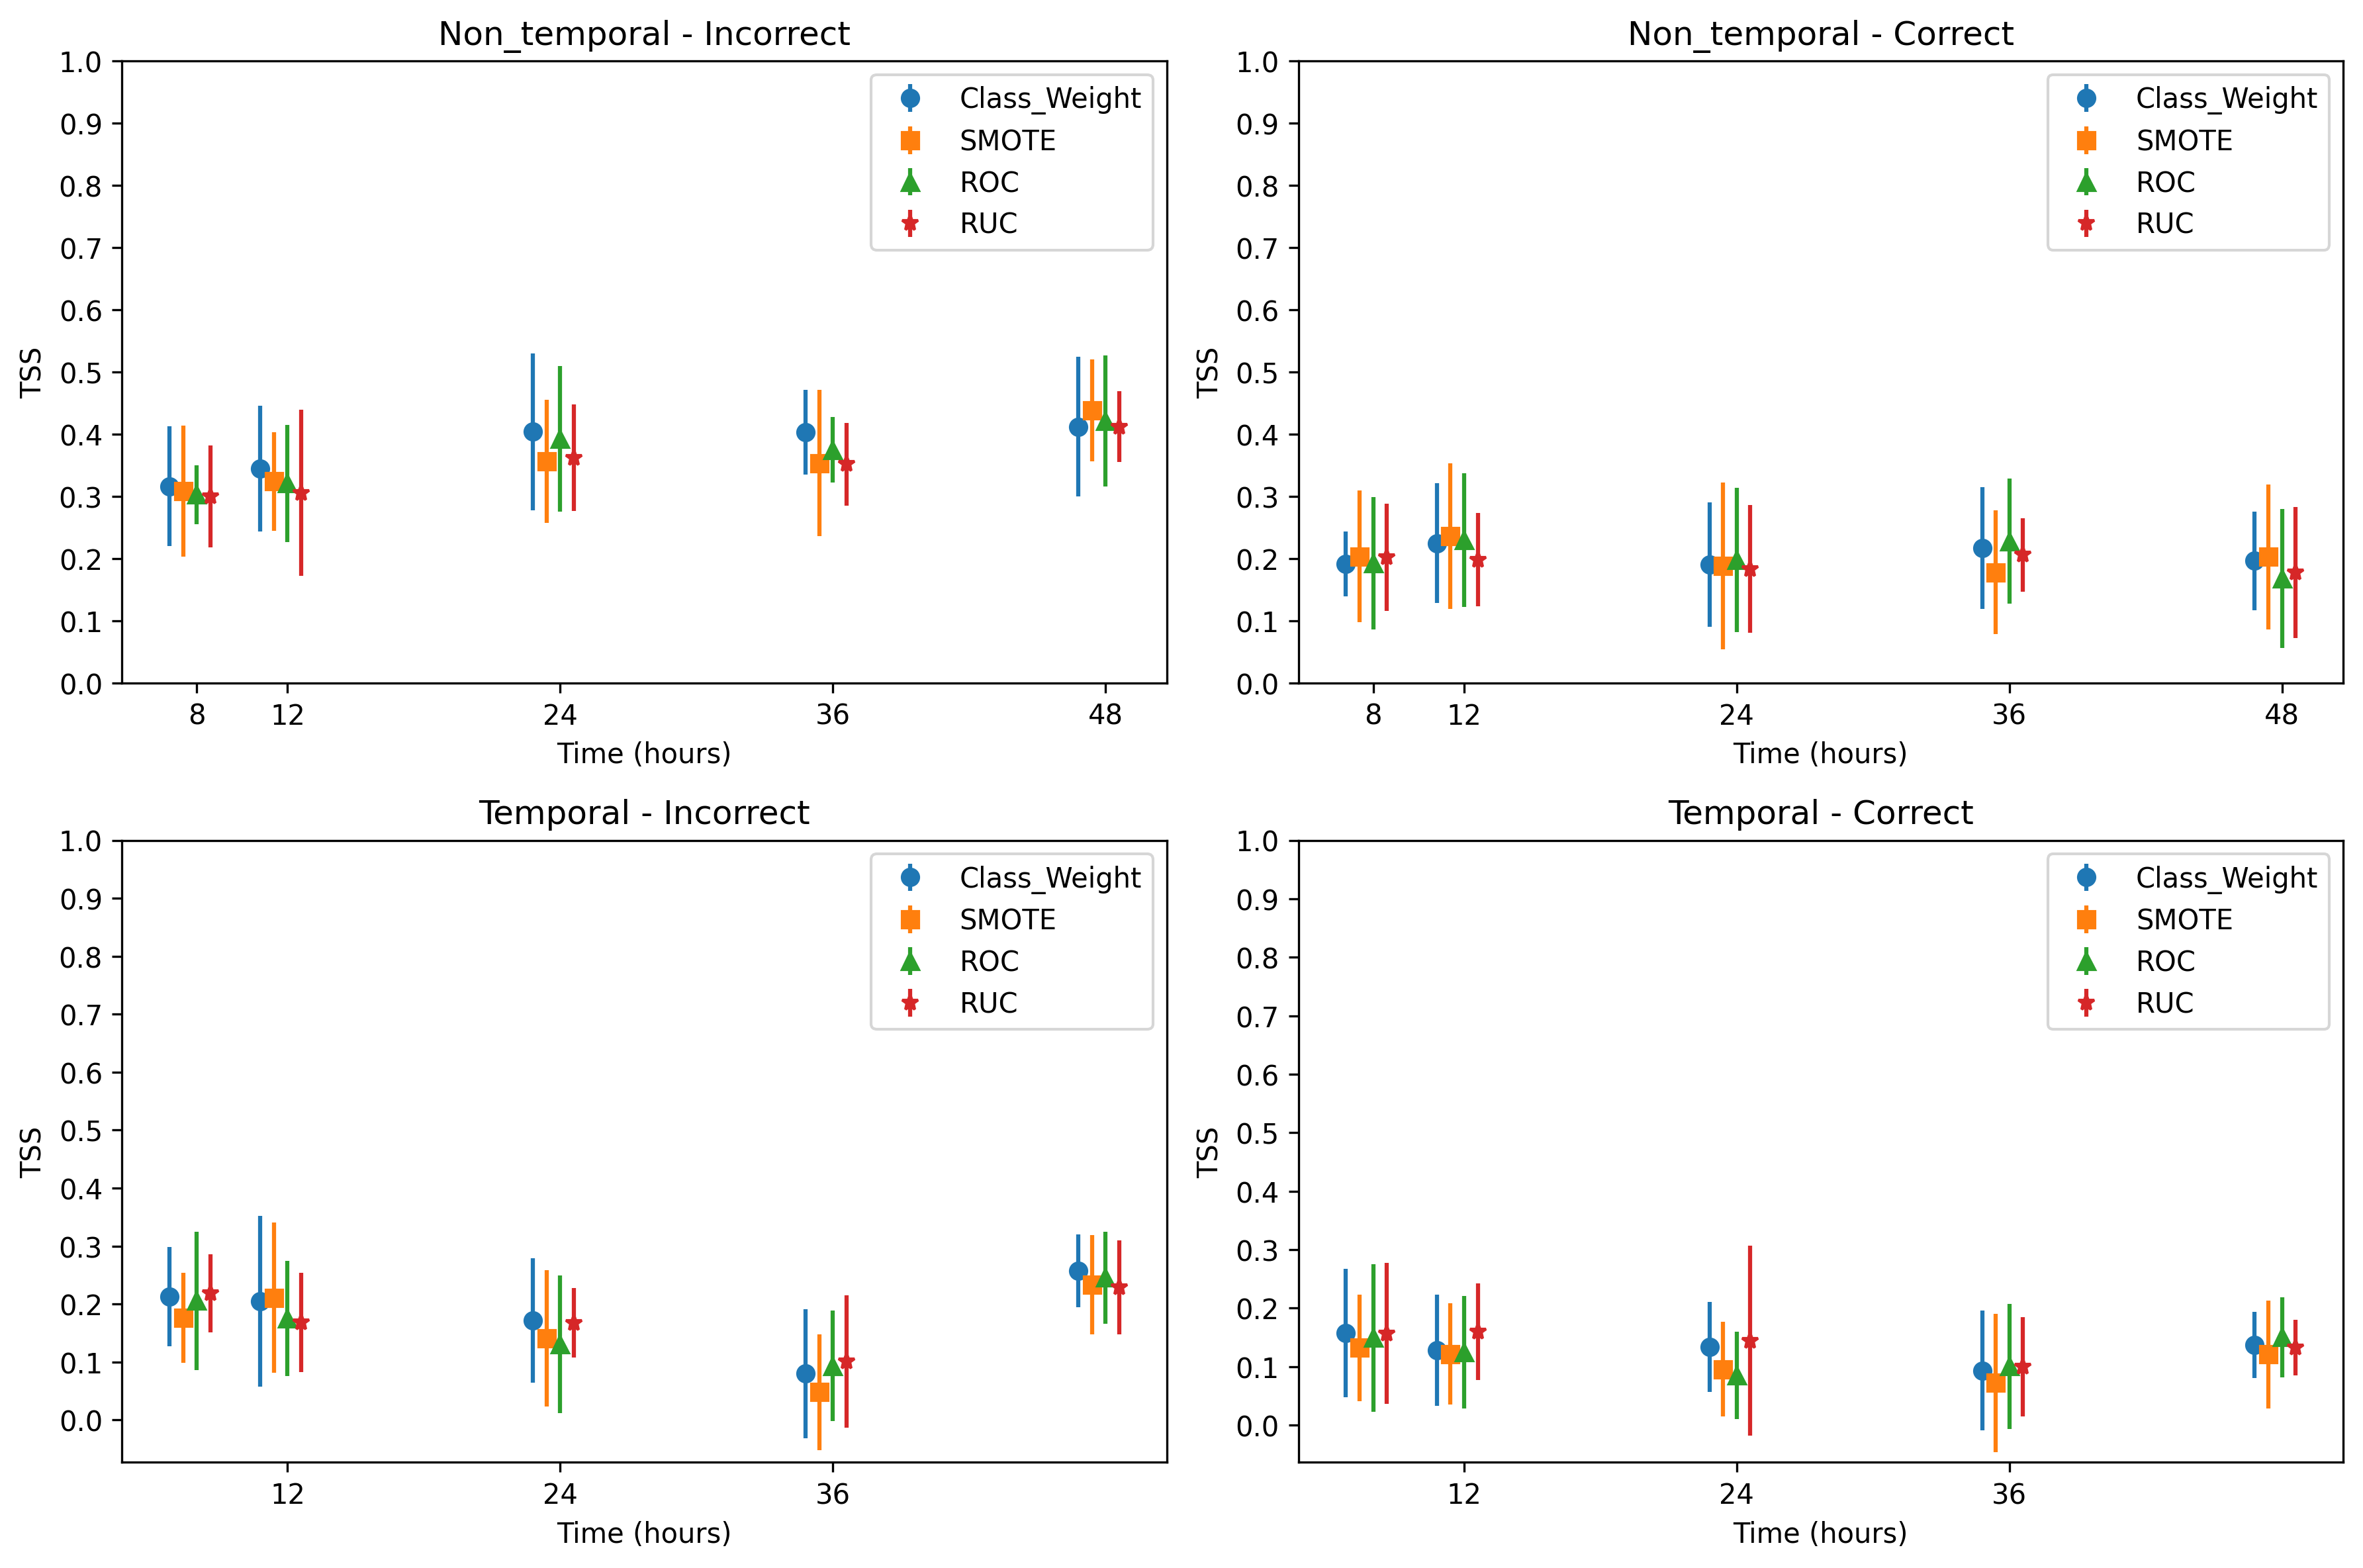

In [ ]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8, 12, 24, 36, 48]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_gb_incorrect[(best_tss_gb_incorrect['datatype'] == value) &(best_tss_gb_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_gb_correct[(best_tss_gb_correct['datatype'] == value) & (best_tss_gb_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

## Adaboost

In [ ]:
# Loading the results
ab_incorrect = pd.read_csv("ml_methods/adaboost_incorrect.csv")
ab_correct = pd.read_csv("ml_methods/adaboost_correct.csv")

# For incorrect normalisation
list_best_rows = []
for datatype in ab_incorrect['datatype'].unique():
  data = ab_incorrect[ab_incorrect['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_ab_incorrect = pd.DataFrame(list_best_rows).reset_index(drop=True)

# For correct normalisation
list_best_rows = []
for datatype in ab_correct['datatype'].unique():
  data = ab_correct[ab_correct['datatype'] == datatype]
  for sampling in data['sampling'].unique():
    method_type = data[data['sampling'] == sampling]
    for time in method_type['time_step'].unique():
      subset = method_type[method_type['time_step'] == time]
      best_tss_row = subset.loc[subset['tss_mean'].idxmax()]
      list_best_rows.append(best_tss_row)
best_tss_ab_correct = pd.DataFrame(list_best_rows).reset_index(drop=True)

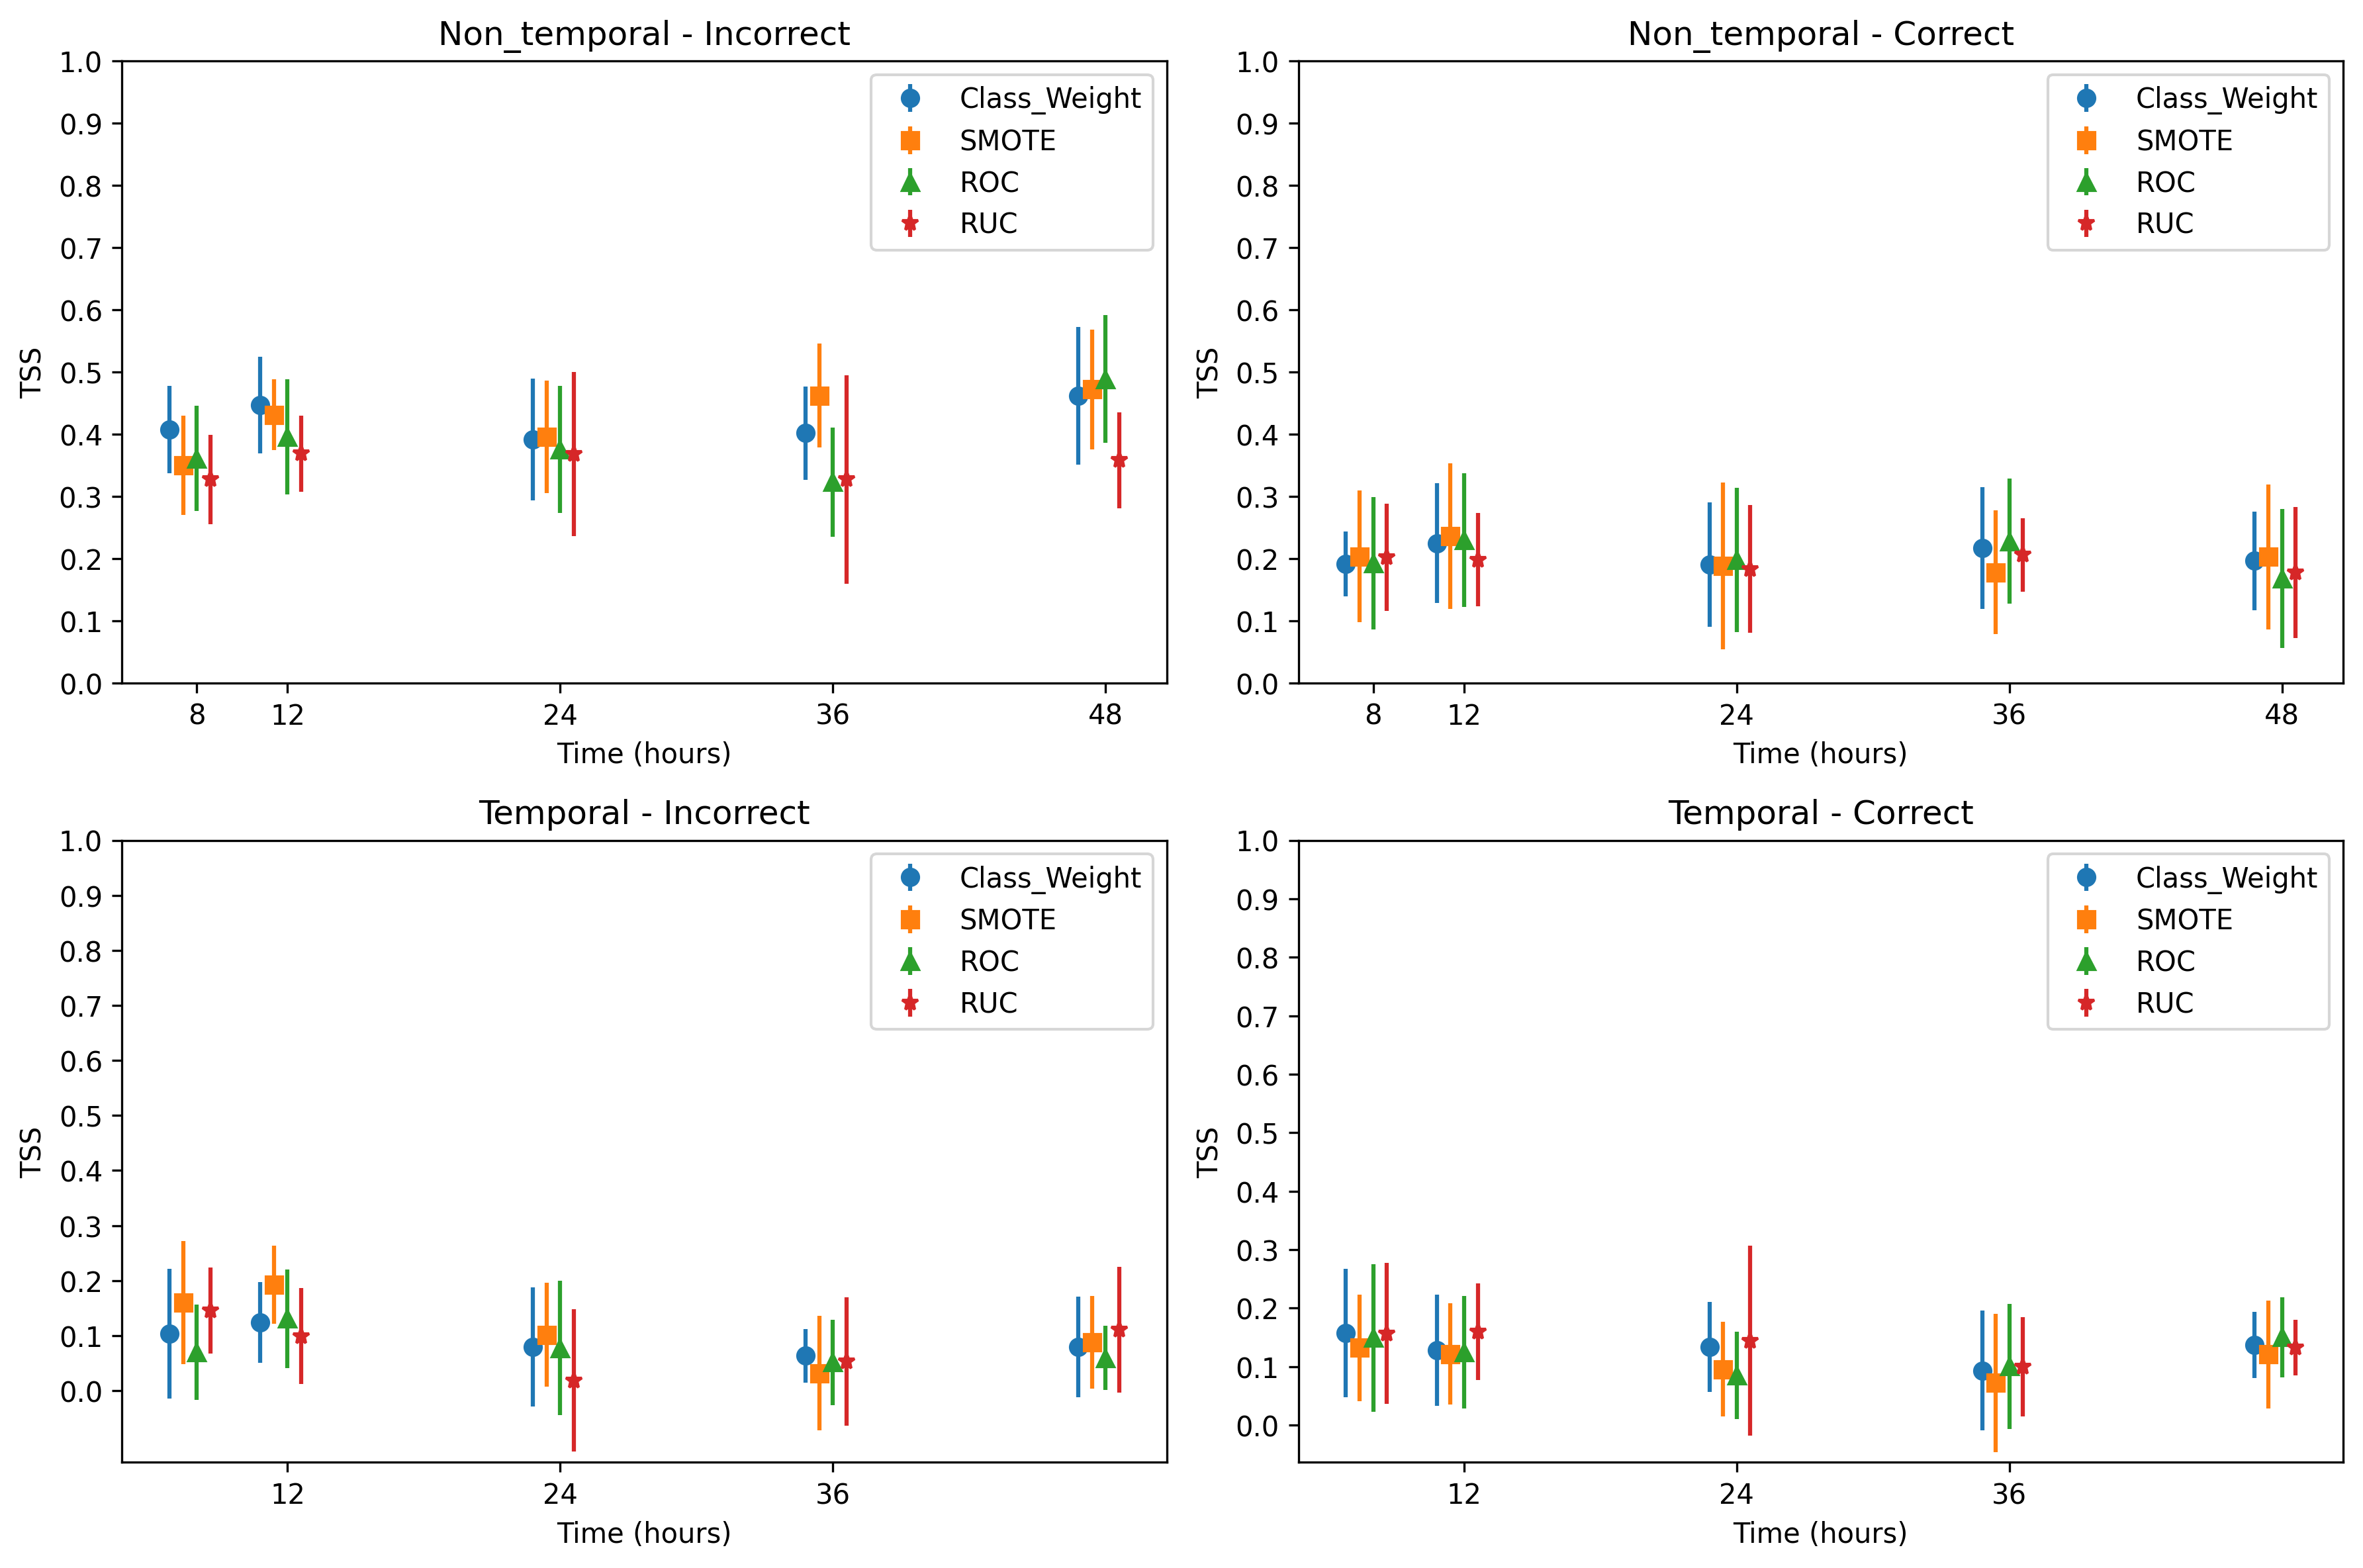

In [ ]:
fig = plt.figure(figsize=(12, 8),dpi = 300)

for i, value, time in zip([0, 1],['Non_temporal', 'Temporal'],[[8, 12, 24, 36, 48], [8,12, 24, 36,48]]):
    # Incorrect Normalisation subplot
    plt.subplot(2, 2, i*2 + 1)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        incorrect_df = best_tss_ab_incorrect[(best_tss_ab_incorrect['datatype'] == value) &(best_tss_ab_incorrect['sampling'] == k)]
        plt.errorbar(incorrect_df["time_step"]+ofset, incorrect_df["tss_mean"], yerr=incorrect_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Incorrect")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

    # Correct Normalisation subplot
    plt.subplot(2, 2, i*2 + 2)
    ofset = -1.2
    for k, name, marker in zip(['class_weight', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler'],['Class_Weight', "SMOTE", 'ROC', "RUC"],['o', 's', '^', '*']):
        correct_df = best_tss_gb_correct[(best_tss_ab_correct['datatype'] == value) & (best_tss_gb_correct['sampling'] == k)]
        plt.errorbar(correct_df["time_step"]+ofset, correct_df["tss_mean"], yerr=correct_df['tss_std'],linestyle='None', marker=marker, label=name, capsize=0)
        ofset += 0.6
    plt.title(f"{value} - Correct")
    plt.xticks(time)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Time (hours)")
    plt.ylabel("TSS")
    plt.legend()

plt.tight_layout()
plt.show()

# Performance Metric

In [ ]:
incorrect_pm = []

for model in ["svm","lda","xgboost","rf","dt","lr","gb","ab"]:
    df = globals()[f"best_tss_{model}_incorrect"]

    row = df[(df["datatype"] == "Non_temporal") & (df["sampling"] == "SMOTE") & (df["time_step"] == 36)]
    row = row.copy()
    row["model"] = model

    incorrect_pm.append(row)

result_df = pd.concat(incorrect_pm, ignore_index=True)
result_df = result_df[["model","tss_mean","tss_std","far_mean","far_std","fdr_mean","fdr_std","pod_mean","pod_std"]]
result_df

,model,tss_mean,tss_std,far_mean,far_std,fdr_mean,fdr_std,pod_mean,pod_std
0,svm,0.701827,0.046940,0.046753,0.021367,0.149593,0.058574,0.748580,0.052326
1,lda,0.372151,0.104132,0.308152,0.038954,0.569085,0.050253,0.680303,0.085212
2,xgboost,0.597372,0.048548,0.095616,0.015037,0.285899,0.016326,0.692989,0.063240
3,rf,0.525604,0.076247,0.176411,0.039046,0.419114,0.063247,0.702015,0.067038
4,dt,0.389131,0.069106,0.281670,0.038757,0.548917,0.040707,0.670801,0.042895
5,lr,0.379704,0.077032,0.303909,0.025654,0.565248,0.030269,0.683613,0.073323
6,gb,0.353474,0.117630,0.271053,0.044739,0.560236,0.056457,0.624527,0.122572
7,ab,0.461809,0.083469,0.187055,0.044244,0.453004,0.058556,0.648864,0.081040


In [ ]:
correct_pm = []

for model in ["svm","lda","xgboost","rf","dt","lr","gb","ab"]:
    df = globals()[f"best_tss_{model}_correct"]

    row = df[(df["datatype"] == "Non_temporal") & (df["sampling"] == "SMOTE") & (df["time_step"] == 36)]
    row = row.copy()
    row["model"] = model

    correct_pm.append(row)

result_df = pd.concat(correct_pm, ignore_index=True)
result_df = result_df[["model","tss_mean","tss_std","far_mean","far_std","fdr_mean","fdr_std","pod_mean","pod_std"]]
result_df

,model,tss_mean,tss_std,far_mean,far_std,fdr_mean,fdr_std,pod_mean,pod_std
0,svm,0.252681,0.062775,0.396372,0.053706,0.639403,0.027743,0.649053,0.061927
1,lda,0.214294,0.082990,0.437884,0.067535,0.660767,0.033379,0.652178,0.082293
2,xgboost,0.226420,0.086426,0.208299,0.032054,0.582723,0.059190,0.434719,0.076013
3,rf,0.256020,0.020796,0.380424,0.047722,0.634515,0.015220,0.636443,0.044581
4,dt,0.214853,0.077669,0.303956,0.050395,0.632481,0.029518,0.518810,0.109173
5,lr,0.199325,0.048889,0.405962,0.032121,0.662466,0.018416,0.605288,0.065583
6,gb,0.177873,0.099778,0.371937,0.056430,0.663162,0.044649,0.549811,0.091079
7,ab,0.128090,0.079333,0.269922,0.031223,0.666400,0.044550,0.398011,0.082928


In [ ]:
incorrect_pm = []

for model in ["svm","lda","xgboost","rf","dt","lr","gb","ab"]:
    df = globals()[f"best_tss_{model}_incorrect"]

    row = df[(df["datatype"] == "Temporal") & (df["sampling"] == "SMOTE") & (df["time_step"] == 36)]
    row = row.copy()
    row["model"] = model

    incorrect_pm.append(row)

result_df = pd.concat(incorrect_pm, ignore_index=True)
result_df = result_df[["model","tss_mean","tss_std","far_mean","far_std","fdr_mean","fdr_std","pod_mean","pod_std"]]
result_df

,model,tss_mean,tss_std,far_mean,far_std,fdr_mean,fdr_std,pod_mean,pod_std
0,svm,0.201027,0.105703,0.296284,0.050322,0.631723,0.058068,0.497312,0.086739
1,lda,0.061540,0.073770,0.458567,0.046025,0.719212,0.024697,0.520108,0.078822
2,xgboost,0.169407,0.073330,0.225888,0.013396,0.627879,0.036800,0.395294,0.084985
3,rf,0.154697,0.064128,0.296283,0.023864,0.657113,0.034140,0.450980,0.070507
4,dt,0.124045,0.011027,0.625563,0.095921,0.706919,0.003566,0.749608,0.101569
5,lr,0.087271,0.043385,0.439265,0.010524,0.707613,0.016930,0.526536,0.038171
6,gb,0.047938,0.100409,0.400664,0.027093,0.724701,0.045310,0.448602,0.107785
7,ab,0.031972,0.104280,0.330286,0.048703,0.724558,0.060278,0.362258,0.081764


In [ ]:
correct_pm = []

for model in ["svm","lda","xgboost","rf","dt","lr","gb","ab"]:
    df = globals()[f"best_tss_{model}_correct"]

    row = df[(df["datatype"] == "Temporal") & (df["sampling"] == "SMOTE") & (df["time_step"] == 36)]
    row = row.copy()
    row["model"] = model

    correct_pm.append(row)

result_df = pd.concat(correct_pm, ignore_index=True)
result_df = result_df[["model","tss_mean","tss_std","far_mean","far_std","fdr_mean","fdr_std","pod_mean","pod_std"]]
result_df

,model,tss_mean,tss_std,far_mean,far_std,fdr_mean,fdr_std,pod_mean,pod_std
0,svm,0.164215,0.088384,0.448366,0.051964,0.678983,0.031157,0.612581,0.079390
1,lda,0.084847,0.084422,0.474400,0.055480,0.710050,0.034680,0.559247,0.074674
2,xgboost,0.108466,0.061937,0.240619,0.021570,0.668762,0.039731,0.349085,0.069190
3,rf,0.138064,0.102026,0.417622,0.066634,0.681496,0.046959,0.555686,0.047637
4,dt,0.105233,0.070530,0.358688,0.030128,0.692682,0.035309,0.463922,0.076399
5,lr,0.093755,0.052588,0.468860,0.053194,0.706476,0.022269,0.562614,0.061921
6,gb,0.072024,0.117933,0.450664,0.056419,0.712318,0.049587,0.522688,0.081932
7,ab,0.080821,0.042657,0.307674,0.035479,0.695995,0.023073,0.388495,0.046354
